<a href="https://colab.research.google.com/github/kmrashedulalam/Deep-Learning/blob/master/1_Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [175]:
#Load Dataset
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

In [176]:
xtrain.shape

(60000, 28, 28)

In [177]:
xtest.shape

(10000, 28, 28)

In [178]:
xtrain[1].shape

(28, 28)

In [179]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

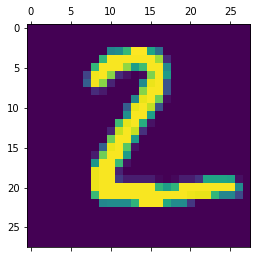

In [180]:
plt.matshow(xtest[1])

In [181]:
#Feature Sclaing
#Normalize 

xtrain = (xtrain / 255)

In [182]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [183]:
xtest = xtest / 255

In [184]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [185]:
#flatten the images into 28*28 = 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [186]:
xtrain[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [187]:
xtrain.shape

(60000, 784)

In [188]:
model = keras.Sequential()
model.add( Dense(50, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='sigmoid'))


In [189]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [195]:
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=20,
          batch_size=32,
          )

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0307 - accuracy: 0.9895
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.9906
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9919
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0179 - accuracy: 0.9938
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - accuracy: 0.9940
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [191]:
#Evaluate 
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9715


[0.11009494960308075, 0.9714999794960022]

In [192]:
pred = model.predict(xtest)

In [193]:
pred

array([[3.43836675e-08, 3.04633296e-09, 1.59012728e-07, ...,
        6.86966717e-01, 4.51330789e-06, 4.14215174e-05],
       [3.35701023e-10, 7.07502795e-06, 1.05267584e-01, ...,
        2.67697377e-13, 3.12970583e-09, 3.49252043e-19],
       [1.67281860e-06, 2.13438272e-02, 1.02543879e-06, ...,
        1.00870457e-04, 3.11642885e-04, 1.00029219e-07],
       ...,
       [2.32279826e-13, 3.09686955e-12, 1.21158852e-16, ...,
        2.82486894e-07, 4.41231704e-11, 8.76221762e-10],
       [4.21935402e-15, 2.02129199e-12, 1.34750040e-13, ...,
        4.05425346e-12, 4.80128790e-07, 4.71747377e-15],
       [1.51725490e-11, 7.11966175e-15, 8.08807243e-09, ...,
        9.89074443e-15, 2.71168643e-10, 1.46747879e-21]], dtype=float32)

In [194]:
np.argmax(pred[1])

2

Text(69.0, 0.5, 'Truth Values')

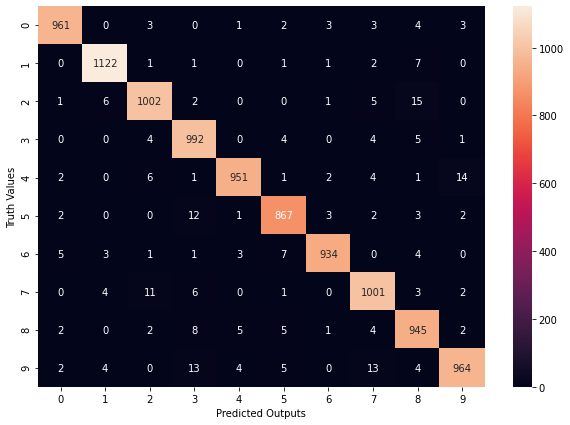

In [200]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')

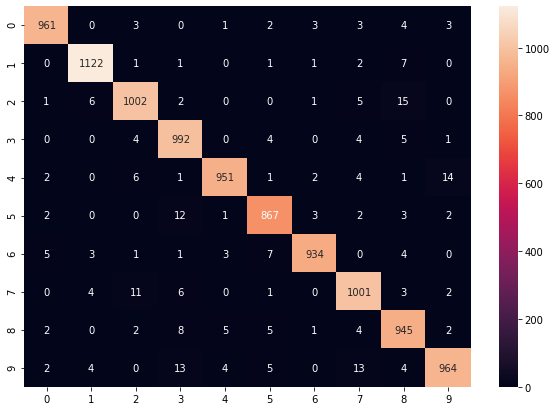